<a href="https://www.kaggle.com/code/kusumakar/fare-prediction-82-accuracy?scriptVersionId=200025394" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/revenue-for-cab-drivers/data.csv


In [2]:
import warnings

In [3]:
df=pd.read_csv("/kaggle/input/revenue-for-cab-drivers/data.csv")

/tmp/ipykernel_17/653946534.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/revenue-for-cab-drivers/data.csv")


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
(df.isnull().sum()/df.shape[0])*100

VendorID                 1.021716
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          1.021716
trip_distance            0.000000
RatecodeID               1.021716
store_and_fwd_flag       1.021716
PULocationID             0.000000
DOLocationID             0.000000
payment_type             1.021716
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
dtype: float64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(6339567, 18)

In [8]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06
mean,1.669624e+00,1.515333e+00,2.848626e+00,1.059908e+00,1.650263e+02,1.629923e+02,1.270298e+00,1.249486e+01,1.098011e+00,4.938029e-01,2.211245e+00,3.350126e-01,2.979684e-01,1.847162e+01,2.299052e+00
std,4.703484e-01,1.151594e+00,3.757127e+00,8.118432e-01,6.538737e+01,6.978119e+01,4.739985e-01,1.195665e+01,1.251903e+00,6.878918e-02,2.764287e+00,1.745776e+00,3.401817e-02,1.463892e+01,7.017109e-01
min,1.000000e+00,0.000000e+00,-2.218000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.900000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.956000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.628800e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [9]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [10]:
relevant_features=[]

In [11]:
df.drop(columns=['VendorID'])

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
6339563,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
6339564,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
6339565,2020-01-31 23:44:22,2020-01-31 23:54:00,1.0,1.61,1.0,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5


<Axes: >

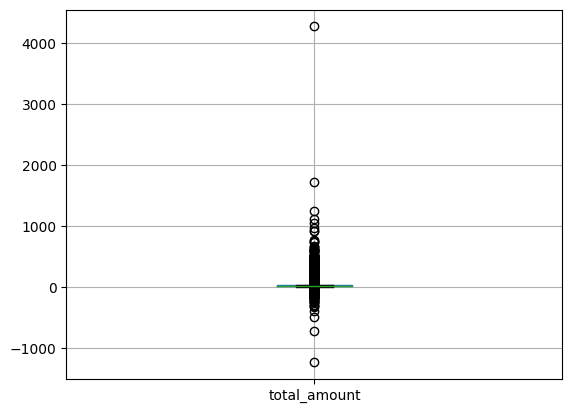

In [12]:
df[['total_amount']].boxplot()

In [13]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
df_clean=remove_outlier(df,'total_amount')

<Axes: >

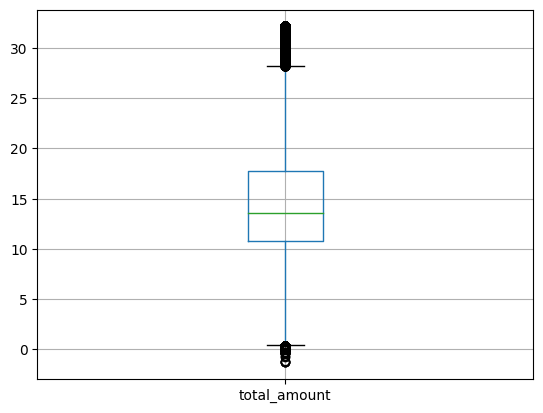

In [14]:
df_clean[['total_amount']].boxplot()

<Axes: >

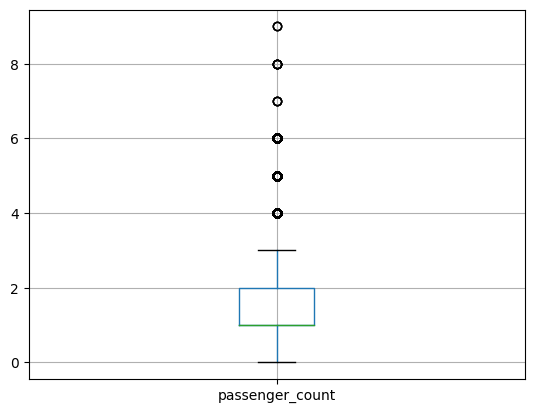

In [15]:
df_clean[['passenger_count']].boxplot()

In [16]:
df_clean=remove_outlier(df_clean,'passenger_count')

<Axes: >

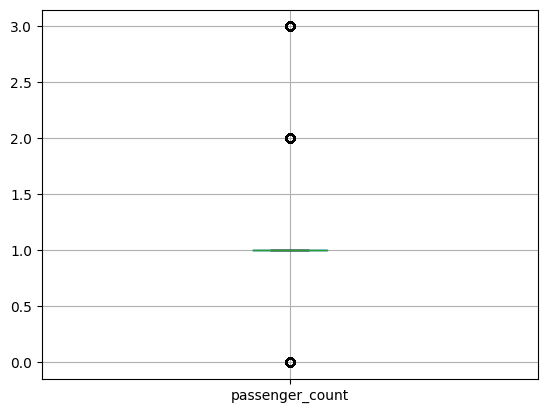

In [17]:
df_clean[['passenger_count']].boxplot()

In [18]:
df_clean=remove_outlier(df_clean,'trip_distance')

<Axes: >

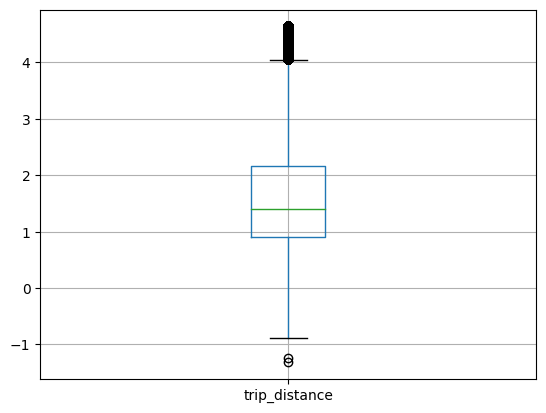

In [19]:
df_clean[['trip_distance']].boxplot()

In [20]:
df_clean = df_clean[df_clean.trip_distance>0]

In [21]:
numerical = df_clean.select_dtypes(include=['float64','int64']).columns

In [22]:
df_clean.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

<Axes: >

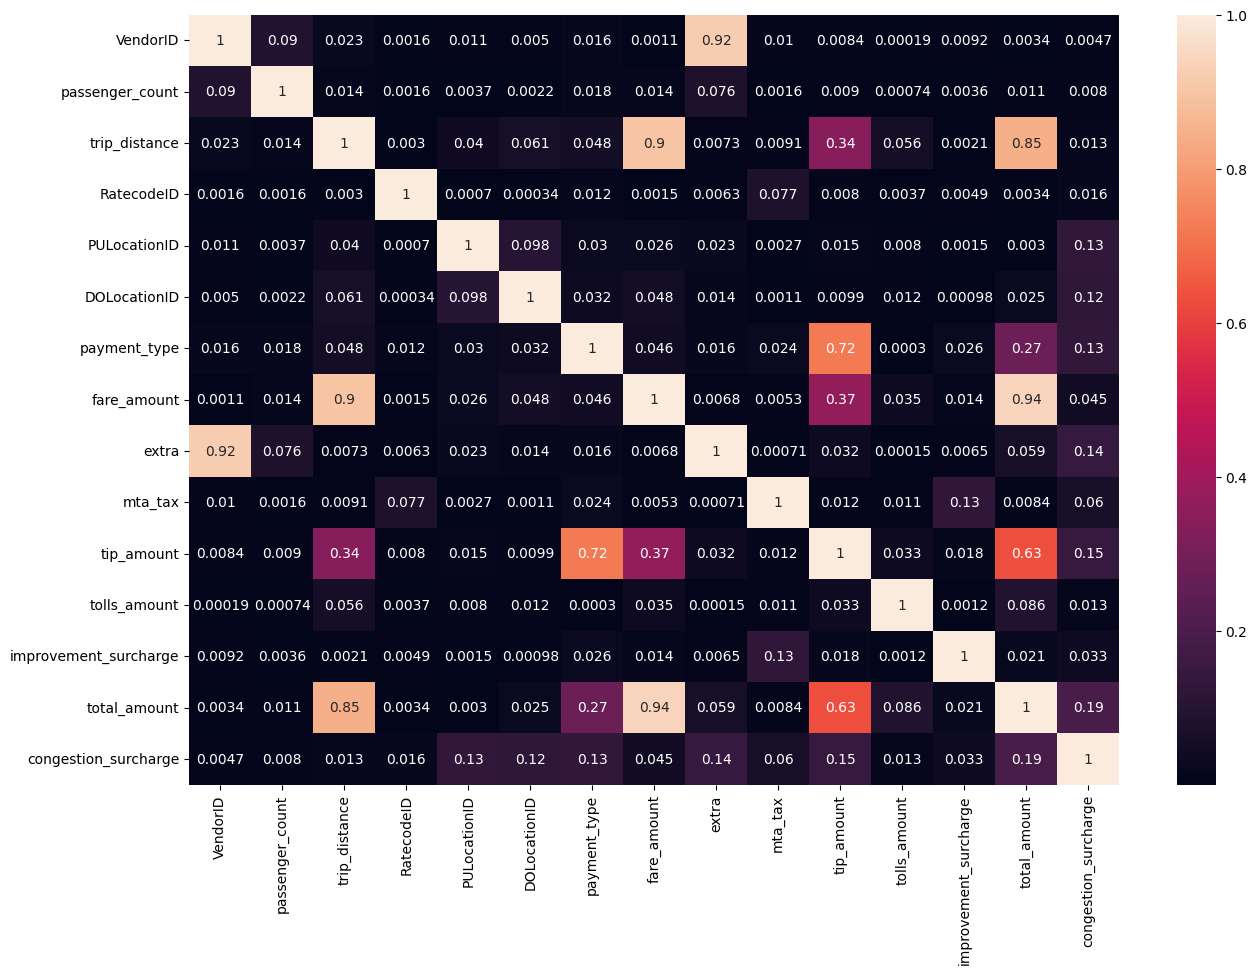

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df_clean[numerical].corr().abs(),annot=True)

In [24]:
relevant_columns = ['trip_distance','payment_type','DOLocationID']

<Axes: xlabel='fare_amount', ylabel='count'>

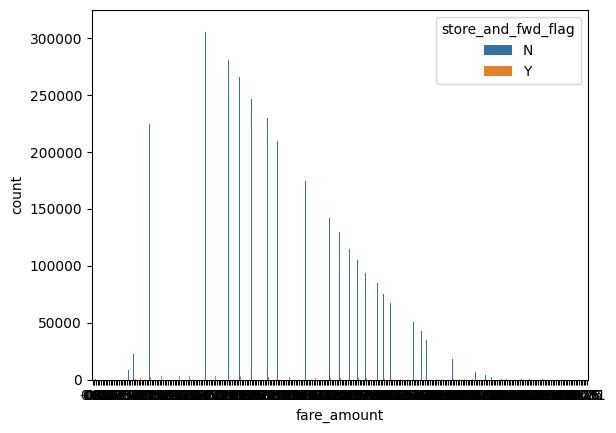

In [25]:
sns.countplot(x='fare_amount',hue='store_and_fwd_flag',data=df_clean)

In [26]:
df_clean['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    4868480
Y      54460
Name: count, dtype: int64

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(
[(
"scale",StandardScaler(),relevant_columns
)],remainder="passthrough")

In [29]:
df_clean

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
5,2.0,2020-01-01 00:09:44,2020-01-01 00:10:37,1.0,0.03,1.0,N,7,193,2.0,2.5,0.5,0.5,0.00,0.0,0.3,3.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339561,2.0,2020-01-31 23:00:01,2020-01-31 23:21:31,1.0,4.11,1.0,N,48,75,1.0,17.5,0.5,0.5,4.26,0.0,0.3,25.56,2.5
6339562,2.0,2020-01-31 23:38:07,2020-01-31 23:52:21,1.0,2.10,1.0,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
6339563,2.0,2020-01-31 23:00:18,2020-01-31 23:19:18,1.0,2.13,1.0,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
6339564,2.0,2020-01-31 23:24:22,2020-01-31 23:40:39,1.0,2.55,1.0,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5


In [30]:
X=df_clean[relevant_columns]
Y=df_clean['fare_amount']

In [31]:
relevant_columns

['trip_distance', 'payment_type', 'DOLocationID']

In [32]:
X

,trip_distance,payment_type,DOLocationID
0,1.20,1.0,239
1,1.20,1.0,238
2,0.60,1.0,238
3,0.80,1.0,151
5,0.03,2.0,193
...,...,...,...
6339561,4.11,1.0,75
6339562,2.10,1.0,246
6339563,2.13,1.0,79
6339564,2.55,1.0,68


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [35]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor()
rg.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [36]:
rg.score(X_train_transformed,y_train)

0.8319809648856347

In [37]:
y_pred = rg.predict(X_test_transformed)

In [38]:
from sklearn.metrics import r2_score
print("RANDOM FOREST R2 SCORE" ,r2_score(y_pred,y_test))

RANDOM FOREST R2 SCORE 0.7833257772633264


In [39]:
print("RANDOM FOREST REGRESSOR SCORE ",rg.score(X_train_transformed,y_train))

RANDOM FOREST REGRESSOR SCORE  0.8319809648856347


In [40]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train_transformed,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
print("XGBOOST MODEL SCORE",model.score(X_train_transformed,y_train))

XGBOOST MODEL SCORE 0.8257790908776401


In [42]:
y_pred = model.predict(X_test_transformed)

In [43]:
print("R2 Score in XG Boost ", r2_score(y_pred,y_test))

R2 Score in XG Boost  0.7873722246898733
